## 딥러닝응용 1주차 과제
### DL Regression

In [32]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load Data
df = pd.read_csv('abalone.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


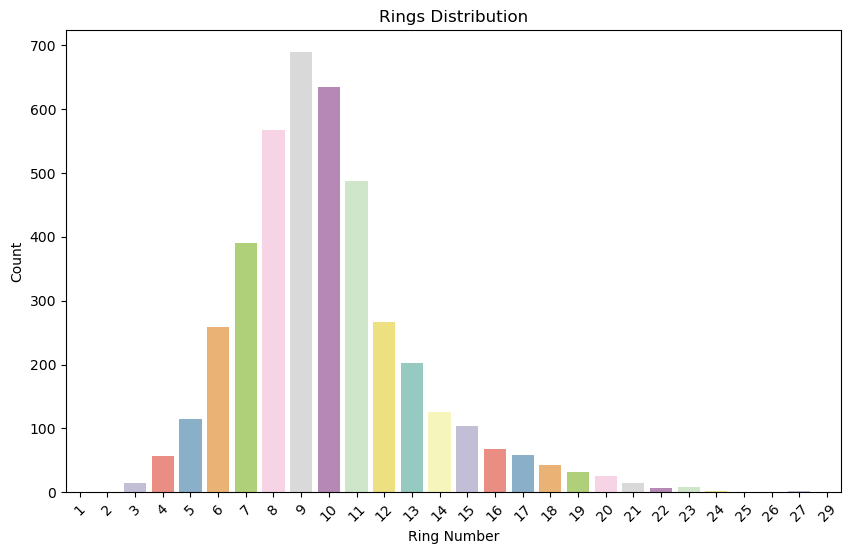

In [34]:
# Visualize Rings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rings', hue='Rings', palette='Set3', legend=False)
plt.title('Rings Distribution')
plt.xlabel('Ring Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Data Preproccesing
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df = df.drop(['id'], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [36]:
df.shape

(4177, 9)

In [37]:
# Create Target
x = df.drop(['Rings'], axis=1)
y = df['Rings']

In [38]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [39]:
# Import Libraries
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

device = "cuda" if torch.cuda.is_available() else "cpu"

# Convert to PyTorch Tensors
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Dataset and DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [40]:
# NeuralNetwork Class 
class NeuralNetwork(nn.Module):
    def __init__(self, n_input, n_hidden):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(n_hidden, 1)  

    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x

# Hyperparameters
n_input = x_train.shape[1]   
n_hidden = 64                

# Functions
model = NeuralNetwork(n_input, n_hidden).to(device)
loss_fn = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train Function
def train(dataloader, model, loss_fn, optimizer):
    model.train() 
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


# Test Function
def test(dataloader, model, loss_fn):
    model.eval()  
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():  
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    print(f"Avg loss: {test_loss:.6f} \n")

# Train + Test Loop
epochs = 20
for t in range(epochs):
    print(f"Epoch [{t+1}/{epochs}]")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
    print("-" * 30)

print("Done!")

Epoch [1/20]
Avg loss: 9.979157 

------------------------------
Epoch [2/20]
Avg loss: 8.423955 

------------------------------
Epoch [3/20]
Avg loss: 7.661904 

------------------------------
Epoch [4/20]
Avg loss: 7.296551 

------------------------------
Epoch [5/20]
Avg loss: 7.023834 

------------------------------
Epoch [6/20]
Avg loss: 6.777722 

------------------------------
Epoch [7/20]
Avg loss: 6.737792 

------------------------------
Epoch [8/20]
Avg loss: 6.439744 

------------------------------
Epoch [9/20]
Avg loss: 6.272287 

------------------------------
Epoch [10/20]
Avg loss: 6.060488 

------------------------------
Epoch [11/20]
Avg loss: 6.156373 

------------------------------
Epoch [12/20]
Avg loss: 5.829288 

------------------------------
Epoch [13/20]
Avg loss: 5.715606 

------------------------------
Epoch [14/20]
Avg loss: 5.601639 

------------------------------
Epoch [15/20]
Avg loss: 5.458688 

------------------------------
Epoch [16/20]
Avg l

Mean Squared Error (MSE): 5.1268
Mean Absolute Error (MAE): 1.6114
R² Score: 0.5195


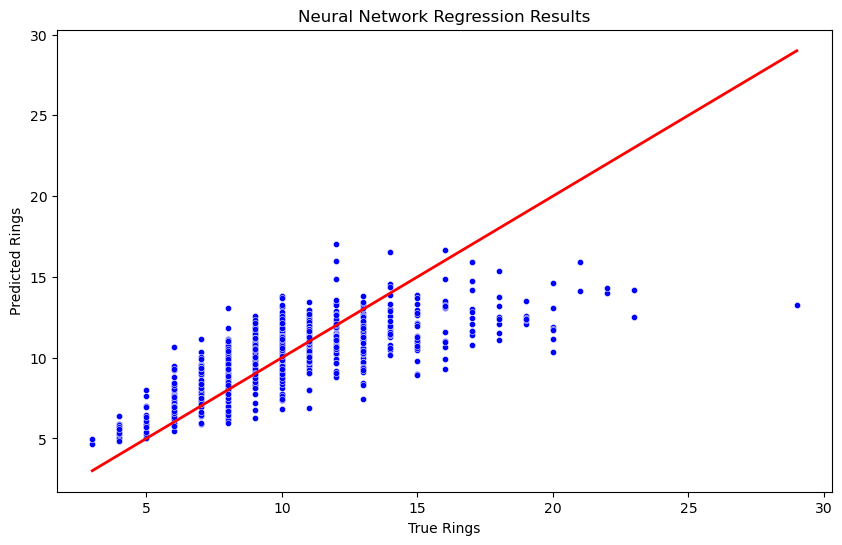

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model.eval()
y_pred = []
y_test = []

with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        y_pred.extend(pred.cpu().numpy())  
        y_test.extend(y.cpu().numpy())    

# Convert lists to arrays for easier plotting
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plotting predicted vs true values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) 
plt.xlabel('True Rings')
plt.ylabel('Predicted Rings')
plt.title('Neural Network Regression Results')
plt.show()